# Synthetic experiments with $\texttt{LieDetect}$

Henrique Hennes https://github.com/HLovisiEnnes \
Raphaël Tinarrage https://raphaeltinarrage.github.io/

See the repo at https://github.com/HLovisiEnnes/LieDetect and the article at https://arxiv.org/abs/2309.03086

**This notebook gathers all the expriments on synthetic datasets presented in our article.**

In [1]:
# Standard imports.
import time
import random

# Third-party imports.
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import ot
import gudhi

# Local imports.
from algebra import are_representations_equivalent, skew_sym_to_vect, get_constrained_partitions, get_lattices, \
    get_canonical_pushforward_algebra
from orbits import sample_orbit_from_group, sample_orbit_from_rep, sample_orbit_from_algebra
from liepca import get_lie_pca_operator
from optimization import find_closest_algebra

2025-06-24 00:05:34.927849: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 00:05:34.945814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750716334.969406  144961 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750716334.976174  144961 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750716334.993792  144961 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Section 3

## Example 3.3

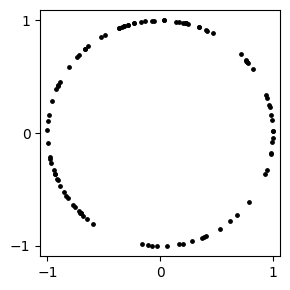

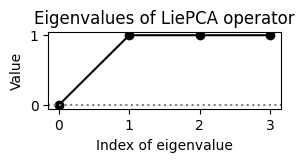

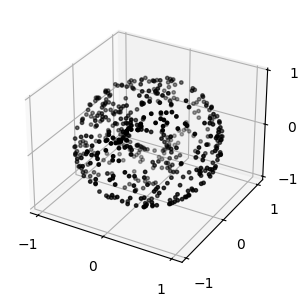

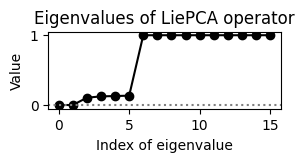

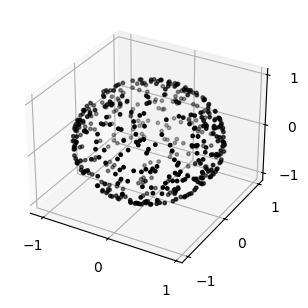

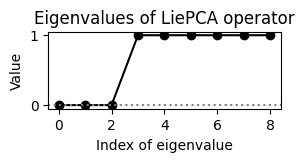

In [2]:
''' Examples Lie-PCA '''

' Lie-PCA on circle '

# Generate dataset
dim = 1
ambient_dim = 2
n_points = 100
X = np.random.randn(ambient_dim, n_points)
X /= np.linalg.norm(X, axis=0)
X = X.T

# Plot
fig = plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c='black', s=6)
plt.locator_params(nbins=4)
plt.axis('equal')
plt.tight_layout()
plt.show()
fig.savefig('figures/circ.png', dpi=fig.dpi, bbox_inches='tight')

# Compute Lie-PCA operator
n_neighbors = 5
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))
fig = plt.figure(figsize=(3, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/lie_pca_circ.png', dpi=fig.dpi, bbox_inches='tight')

' Lie-PCA on torus '

# Generate dataset
dim = 2
ambient_dim = 4
n_points = 500
X = sample_orbit_from_rep("torus", rep_type=((1, 0), (0, 1)), nb_points=n_points, conjugate_algebra=False,
                          translate_orbit=False, verbose=False)

# Plot
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(projection='3d')
Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=6)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/torus.png', dpi=fig.dpi, bbox_inches='tight')

# Compute Lie-PCA operator
n_neighbors = 10
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/lie_pca_torus.png', dpi=fig.dpi, bbox_inches='tight')

' Lie-PCA on sphere '

# Generate dataset
dim = 2
ambient_dim = 3
n_points = 500
X = np.random.randn(ambient_dim, n_points)
X /= np.linalg.norm(X, axis=0)
X = X.T

# Plot
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(projection='3d')
Xpca = sklearn.decomposition.PCA(n_components=3).fit_transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=6)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/sphere.png', dpi=fig.dpi, bbox_inches='tight')

# Compute Lie-PCA operator
n_neighbors = 10
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/lie_pca_sphere.png', dpi=fig.dpi, bbox_inches='tight')

## Example 3.2

Sampled 300 random points on the orbit of torus with rep ((1, 4),).


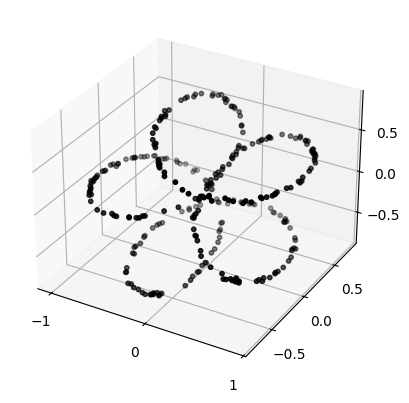

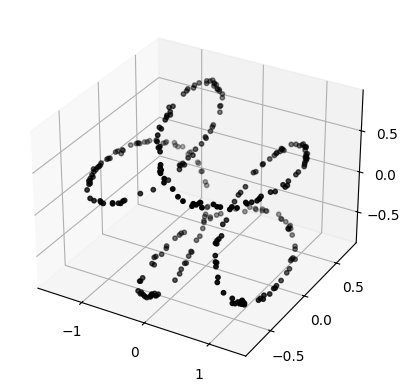

In [3]:
''' Running example '''

' Generate dataset '

# Parameters
ambient_dim = 4  # ambient dimension
dim = 1  # dimension of the torus (here, circle)
n_points = 300  # number of sample points
frequency_max = 4  # maximal angle parameter
var = 0.0001  # gaussian noise

# Generate dataset and plot
X = sample_orbit_from_rep("torus", rep_type=((1, 4),), nb_points=n_points, conjugate_algebra=True, translate_orbit=True,
                          verbose=True)
X = X + np.random.multivariate_normal(np.array((0, 0, 0, 0)), var * np.eye(4), n_points)  # Add noise

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
pca = sklearn.decomposition.PCA(n_components=3).fit(X)
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_X.png', dpi=fig.dpi, bbox_inches='tight')

# Define not orthogonal X
X_notorthogonal = X.copy()
X_notorthogonal[:, 1] = 2 * X_notorthogonal[:, 1]

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X_notorthogonal)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_X_notorthogonal.png', dpi=fig.dpi, bbox_inches='tight')

## Example 3.4

Eigenvalues: [0.00238445 0.15229308 0.16109326 0.21093217 0.21687056 0.25471618
 1.         1.         1.         1.         1.00000037 1.00001464
 1.00083823 1.00092375 1.00103321 1.00130043]


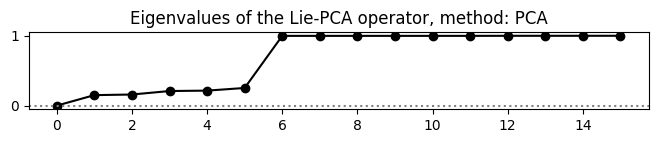

In [4]:
' Lie-PCA '

n_neighbors = 10
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of the Lie-PCA operator, method: ' + method)
plt.show()

## Example 3.5

In [5]:
# Find frequencies
frequency_max = 4
method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True, verbose_top_scores=True)

----> Optimization problem via bottom_lie_pca method for torus  <----
Solve minimization problem... It 5/5. Duration 0:00:01. Remaining 0:00:00.
The optimal rep found is ((1, 4),) with cost 3.721e-06.
    (((1, 4),), '+1') - cost 3.721e-06 (best cost #1/10)
    (((1, 3),), '+1') - cost 1.135e-02 (best cost #2/10)
    (((1, 2),), '+1') - cost 9.297e-02 (best cost #3/10)
    (((2, 3),), '+1') - cost 2.245e-01 (best cost #4/10)
    (((3, 4),), '+1') - cost 2.992e-01 (best cost #5/10)
    (((1, 4),), '-1') - cost 4.452e-01 (best cost #6/10)
    (((1, 3),), '-1') - cost 5.789e-01 (best cost #7/10)
    (((1, 2),), '-1') - cost 8.498e-01 (best cost #8/10)
    (((2, 3),), '-1') - cost 1.098e+00 (best cost #9/10)
    (((3, 4),), '-1') - cost 1.207e+00 (best cost #10/10)


## Example 3.6

In [6]:
# Find frequencies
frequency_max = 4
method = 'full_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True, verbose_top_scores=True)

----> Optimization problem via full_lie_pca method for torus  <----
Solve minimization problem... It 5/5. Duration 0:00:13. Remaining 0:00:00.
The optimal rep found is ((1, 4),) with cost 2.325e-04.
    (((1, 4),), '+1') - cost 2.325e-04 (best cost #1/10)
    (((1, 3),), '+1') - cost 7.156e-03 (best cost #2/10)
    (((1, 2),), '+1') - cost 2.882e-02 (best cost #3/10)
    (((2, 3),), '+1') - cost 1.806e-01 (best cost #4/10)
    (((1, 2),), '-1') - cost 1.905e-01 (best cost #5/10)
    (((1, 3),), '-1') - cost 2.938e-01 (best cost #6/10)
    (((3, 4),), '+1') - cost 4.627e-01 (best cost #7/10)
    (((1, 4),), '-1') - cost 4.794e-01 (best cost #8/10)
    (((2, 3),), '-1') - cost 6.054e-01 (best cost #9/10)
    (((3, 4),), '-1') - cost 1.145e+00 (best cost #10/10)


## Example 3.8

Non-symmetric Hausdorff distance from X to estimated orbit: 0.0504


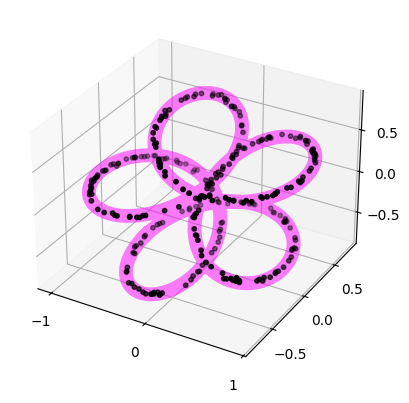

In [7]:
' Plot orbit '

# Generate estimated orbit
n_points_orbit = 300
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=10, alpha=0.5)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_orbit_2.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.2

In [8]:
# Find frequencies
frequency_max = 4
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True, verbose_top_scores=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 300
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((1, 4),) with cost 1.364e-03.
    ((1, 4),) - cost 1.364e-03 (best cost #1/5)
    ((1, 3),) - cost 7.539e-02 (best cost #2/5)
    ((1, 2),) - cost 2.169e-01 (best cost #3/5)
    ((2, 3),) - cost 3.400e-01 (best cost #4/5)
    ((3, 4),) - cost 3.946e-01 (best cost #5/5)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.0504


2-Wasserstein distance from X to averaged estimated orbit: 0.2899599089563544 


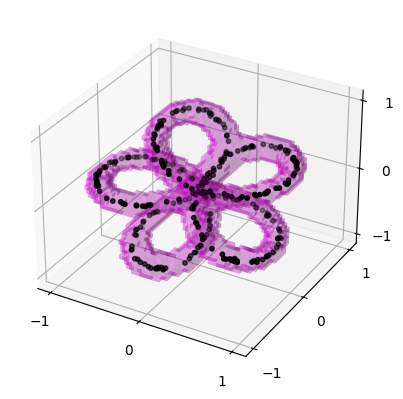

In [9]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
Orbits = [sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x) for x
          in X]
OrbitsConcatenation = np.concatenate(Orbits)

# Compute OT
lmbda = 0.1
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(
    OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T * M))
print('\x1b[1;31m' + '2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein, '\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3, (n_voxels + 1) ** 3).T)).reshape(np.shape(x))
SublevelSet = CubeScores > 0.5

# Plot X
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)

# Plot kde
ymin = 0.5
SublevelSet = CubeScores > ymin
colors = np.zeros(CubeScores.shape + (3,))
r, g, b = 1, 0, 1
coefficients = 1 - (CubeScores - ymin) / (np.max(CubeScores) - ymin)
colors[..., 0], colors[..., 1], colors[..., 2] = r * coefficients, g * coefficients, b * coefficients
n_voxels += 1
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
ax.voxels(x, y, z, filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_orbit_2_average.png', dpi=fig.dpi, bbox_inches='tight');

## Example 3.9

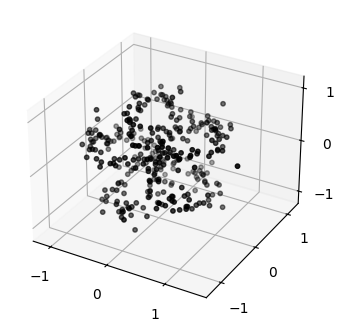

In [10]:
''' Algorithm corrupted dataset '''

' Corrupt dataset '

# Add Gaussian noise
sigma = 0.01
gaussian_noise = np.random.multivariate_normal(mean=[0] * ambient_dim, cov=sigma * np.eye(ambient_dim), size=len(X))
X = X + gaussian_noise

# Add anomalous points
anomalous_points = np.random.uniform(low=-1, high=1, size=(30, ambient_dim))
X = np.concatenate((X, anomalous_points))

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
plt.locator_params(nbins=4)

Eigenvalues: [0.108618   0.17077858 0.17642426 0.19861082 0.20634188 0.22303239
 1.         1.         1.         1.         1.00000681 1.00004821
 1.00008922 1.00015829 1.00020041 1.000453  ]


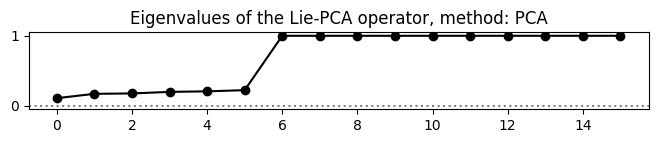

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((1, 4),) with cost 3.832e-02.
Non-symmetric Hausdorff distance from X to estimated orbit: 1.0937


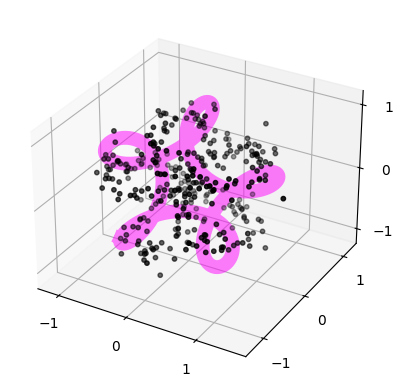

In [11]:
' Lie-PCA '

n_neighbors = 10
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of the Lie-PCA operator, method: ' + method)
plt.show()

' LieDetect '
frequency_max = 4
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 500
x = X[-1, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=10, alpha=0.5)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_corrupted_orbit.png', dpi=fig.dpi, bbox_inches='tight')

2-Wasserstein distance from X to averaged estimated orbit: 0.38275810664270077 


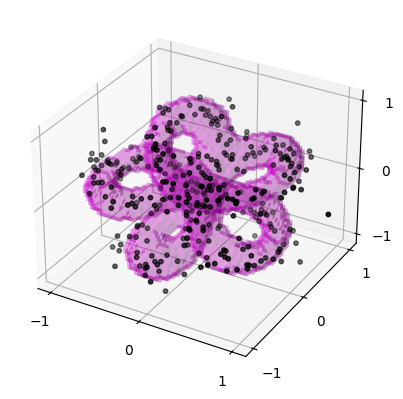

In [12]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
Orbits = [sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x) for x
          in X]
OrbitsConcatenation = np.concatenate(Orbits)

# Compute OT
lmbda = 0.1
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(
    OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T * M))
print('\x1b[1;31m' + '2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein, '\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3, (n_voxels + 1) ** 3).T)).reshape(np.shape(x))
SublevelSet = CubeScores > 0.5

# Plot X
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)

# Plot kde
ymin = 0.275
SublevelSet = CubeScores > ymin
colors = np.zeros(CubeScores.shape + (3,))
r, g, b = 1, 0, 1
coefficients = 1 - (CubeScores - ymin) / (np.max(CubeScores) - ymin)
colors[..., 0], colors[..., 1], colors[..., 2] = r * coefficients, g * coefficients, b * coefficients
n_voxels += 1
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
ax.voxels(x, y, z, filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/RunningExample_corrupted_orbit_average.png', dpi=fig.dpi, bbox_inches='tight')

# Section 4.1

## Example 4.3

Sampled 600 random points on the orbit of torus with rep ((2, 4, 5, 7, 8),).


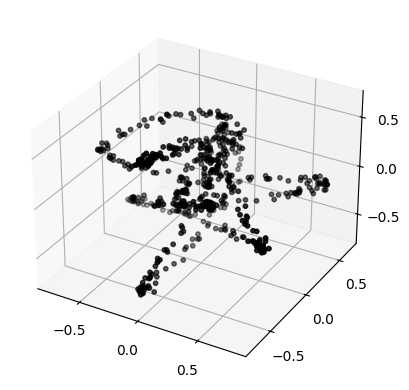

Eigenvalues: [0.00487111 0.04706858 0.04807046 0.05103196 0.05427742 0.06984959
 0.0705763  0.07635924 0.07776739 0.08020555 0.08151524 0.08492472
 0.08527758 0.08742111 0.08775951 0.0886086  0.08944054 0.09109249
 0.0916705  0.09255956 0.09349481 0.09408208 0.09494804 0.09527707
 0.09569958 0.09667635 0.09732152 0.09834341 0.09880234 0.09890392
 0.09958946 0.09981617 0.10128435 0.10190269 0.10244477 0.1030543
 0.10354346 0.10496887 0.10602751 0.10617518 0.10720105 0.10811535
 0.10922512 0.11185252 0.11427188 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00000021 1.00000029 1.00000064 1.00000131 1.00000174
 1.00000224 1.00000255 1.00000321 1.00000329 1.00000417 1.00000475
 1.00000523 1.00000638 1.00000717 1.00000777 1.0000094  1.00001007
 1.00001253 1.00001368 1.00001434 1.00001648 1.00001717 1.00002001
 1.00002103 1.00002325 1.00002547 1.0000269  1.00002904 1.00003231
 1.00003548 1.00003794 1.00004228 1.00004249 1.00004696 1.00005538

In [13]:
''' Algorithm on the representations of SO(2) in R^10 - ((2, 4, 5, 7, 8)) '''

' Generate dataset '

# Parameters
ambient_dim = 10  # ambient dimension
dim = 1  # dimension of the torus (here, circle)
n_points = 600  # number of sample points
frequency_max = 10  # maximal angle parameter

# Generate dataset
Frequencies = ((2, 4, 5, 7, 8),)
X = sample_orbit_from_rep("torus", rep_type=Frequencies, nb_points=n_points, conjugate_algebra=True,
                          translate_orbit=True, verbose=True)

# Add Gaussian noise
sigma = 0.02 ** 2  # gaussian noise
gaussian_noise = np.random.multivariate_normal(mean=[0] * ambient_dim, cov=sigma * np.eye(ambient_dim), size=len(X))
X = X + gaussian_noise

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
pca = sklearn.decomposition.PCA(n_components=3).fit(X)
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()

' Lie-PCA '

n_neighbors = 10
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((2, 4, 5, 7, 8),) with cost 1.382e-02.
The representations ((2, 4, 5, 7, 8),) and ((2, 4, 5, 7, 8),) are equivalent.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.187


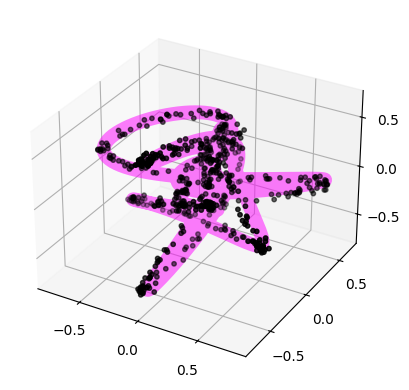

In [14]:
' LieDetect '
frequency_max = 10
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True)
# Check if found frequencies are correct
are_representations_equivalent("torus", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 500
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
Xpca = pca.transform(X)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=10, alpha=0.5)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_corrupted_orbit_R10.png', dpi=fig.dpi, bbox_inches='tight')

2-Wasserstein distance from X to averaged estimated orbit: 0.34733666002296115 


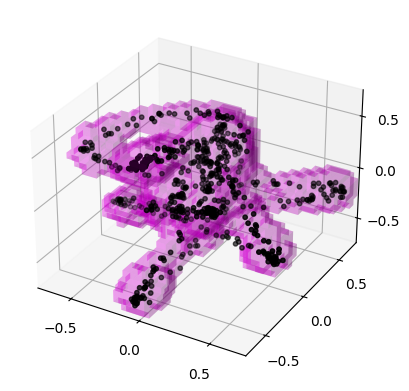

In [15]:
' Compute Wasserstein distance '

# Generate orbits
n_points_orbit = 50
Orbits = [sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x) for x
          in X]
OrbitsConcatenation = np.concatenate(Orbits)

# Compute OT
lmbda = 0.1
a, b = np.ones((len(X),)) / len(X), np.ones((len(OrbitsConcatenation),)) / len(
    OrbitsConcatenation)  # uniform distribution on samples
M = ot.dist(X, OrbitsConcatenation, metric='sqeuclidean')
T = ot.sinkhorn(a, b, M, lmbda, numItermax=10000)
Wasserstein = np.sqrt(np.sum(T * M))
print('\x1b[1;31m' + '2-Wasserstein distance from X to averaged estimated orbit:', Wasserstein, '\x1b[0m')

' Plot average orbit '

n_voxels = 35
bandwidth = 0.1

# Compute kde
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
Cube = np.stack((x, y, z))
OrbitsConcatenationpca = pca.transform(OrbitsConcatenation)
kde = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(OrbitsConcatenationpca)
CubeScores = np.exp(kde.score_samples(Cube.reshape(3, (n_voxels + 1) ** 3).T)).reshape(np.shape(x))
SublevelSet = CubeScores > 0.5

# Plot X
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=10)

# Plot kde
ymin = 0.5
SublevelSet = CubeScores > ymin
colors = np.zeros(CubeScores.shape + (3,))
r, g, b = 1, 0, 1
coefficients = 1 - (CubeScores - ymin) / (np.max(CubeScores) - ymin)
colors[..., 0], colors[..., 1], colors[..., 2] = r * coefficients, g * coefficients, b * coefficients
n_voxels += 1
x, y, z = (np.indices((n_voxels + 1, n_voxels + 1, n_voxels + 1)) - n_voxels / 2) / (n_voxels / 2)
ax.voxels(x, y, z, filled=SublevelSet, facecolors=colors, edgecolor=None, alpha=0.2)
plt.locator_params(nbins=4)
ax.set_xlim((-0.75, 0.75))
ax.set_ylim((-0.75, 0.75))
ax.set_zlim((-0.75, 0.75))
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_corrupted_orbit_R10_average.png', dpi=fig.dpi, bbox_inches='tight');

# Section 4.2

## Example 4.5

Sampled 750 random points on the orbit of torus with rep ((1, 2, 2), (2, 1, 2)).
Eigenvalues: [0.00401269 0.00422936 0.08054816 0.0814648  0.08349021 0.08648193
 0.08953043 0.09044749 0.12120379 0.1282     0.14070045 0.1413801
 0.14679857 0.15063302 0.16712352 1.         1.         1.
 1.         1.         1.         1.00000058 1.0000014  1.00000283
 1.00000493 1.00000781 1.00001088 1.00001933 1.00002899 1.0000476
 1.0000529  1.00005962 1.0000682  1.0000757  1.00009299 1.00012029]


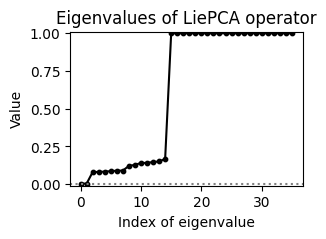

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((-2, -2, 1), (-1, -2, 2)) with cost 1.922e-02.
    ((-2, -2, 1), (-1, -2, 2)) - cost 1.922e-02 (best cost #1/432)
    ((2, 2, -1), (1, 2, -2)) - cost 1.922e-02 (best cost #2/432)
    ((-1, -2, 2), (-2, -2, 1)) - cost 1.922e-02 (best cost #3/432)
    ((1, 2, -2), (2, 2, -1)) - cost 1.922e-02 (best cost #4/432)
    ((-2, -1, 0), (-1, -2, 2)) - cost 1.952e-01 (best cost #5/432)
    ((2, 1, 0), (1, 2, -2)) - cost 1.952e-01 (best cost #6/432)
    ((0, 1, -2), (2, 2, -1)) - cost 1.977e-01 (best cost #7/432)
    ((0, -1, 2), (-2, -2, 1)) - cost 1.977e-01 (best cost #8/432)
    ((-1, 0, -1), (0, 1, -2)) - cost 2.170e-01 (best cost #9/432)
    ((1, 0, 1), (0, -1, 2)) - cost 2.170e-01 (best cost #10/432)
The representations ((1, 2, 2), (2, 1, 2)) and ((-2, -2, 1), (-1, -2, 2)) are equivalent.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.039


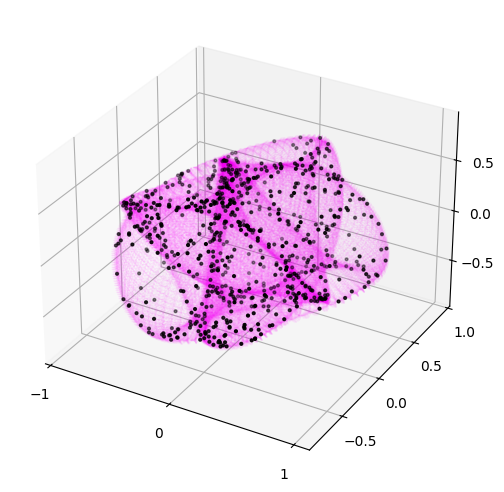

In [16]:
''' Algorithm on the representations of T^2 in R^6 - ((1, 2, 2), (2, 1, 2)) '''

' Generate dataset '

# Parameters
ambient_dim = 6  # ambient dimension
dim = 2  # dimension of the torus
n_points = 750  # number of sample points
frequency_max = 2  # maximal angle parameter

# Generate dataset
Frequencies = ((1, 2, 2), (2, 1, 2))
X = sample_orbit_from_rep("torus", rep_type=Frequencies, nb_points=n_points, conjugate_algebra=True,
                          translate_orbit=True, verbose=True)

' Lie-PCA '

n_neighbors = 15
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/Example_torus_R6_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True, verbose_top_scores=True)

# Check if found frequencies are correct
are_representations_equivalent("torus", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 150 ** 2
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.05, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_torus_R6_2.png', dpi=fig.dpi, bbox_inches='tight');

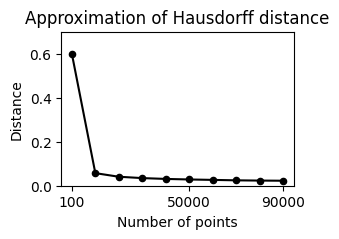

In [17]:
# Plot Hausdorff distances

HausdorffDistances = {}
for n_points_orbit in range(100, 100000, 10000):
    # Generate estimated orbit
    x = X[0, :]  #initial point of X
    Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    HausdorffDistances[n_points_orbit] = Hausdorff

fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
x, y = list(HausdorffDistances.keys()), list(HausdorffDistances.values())
ax.plot(x, y, c='black', label='_nolegend_')
ax.scatter(x, y, c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.0, np.max(y) + 0.1))
ax.set_xticks([100, 50000, 90000])
ax.set_title('Approximation of Hausdorff distance')
ax.set_xlabel('Number of points')
ax.set_ylabel('Distance')
plt.show()
fig.savefig('figures/Example_torus_R6_Hausdorff.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.6

Sampled 1500 random points on the orbit of torus with rep ((1, 2, -1, -2), (-1, 0, 1, 2), (0, -2, -1, 1)).
Eigenvalues: [0.01351774 0.0149901  0.01787281 0.06421121 0.06644828 0.06764286
 0.0685043  0.06912057 0.07058029 0.07093575 0.07198101 0.07293751
 0.074208   0.07576809 0.07630164 0.07675981 0.07827599 0.08262615
 0.08305733 0.08696446 0.08710073 0.0878448  0.08986549 0.10669542
 0.10806305 0.11100694 0.1118895  0.12515676 1.         1.
 1.         1.         1.         1.         1.         1.
 1.00000046 1.00000055 1.00000112 1.00000148 1.00000223 1.00000301
 1.00000349 1.00000426 1.00000491 1.00000582 1.00000739 1.00001141
 1.00001341 1.00001517 1.00002189 1.00003689 1.00007664 1.00008592
 1.00009664 1.00009834 1.00011143 1.00012319 1.0001432  1.0001531
 1.00017782 1.00019243 1.00020818 1.00023526]


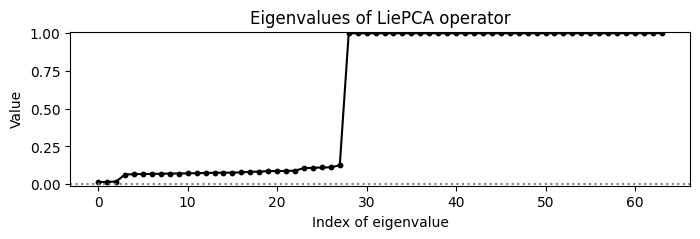

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((-1, -2, -1, 0), (-1, -1, -2, 0), (0, 0, 0, -1)) with cost 1.091e-01.
    ((-1, -2, -1, 0), (-1, -1, -2, 0), (0, 0, 0, -1)) - cost 1.091e-01 (best cost #1/46464)
    ((-1, -2, -1, 0), (-1, -1, -2, 0), (0, 0, 0, 1)) - cost 1.091e-01 (best cost #2/46464)
    ((1, 2, 1, 0), (1, 1, 2, 0), (0, 0, 0, -1)) - cost 1.091e-01 (best cost #3/46464)
    ((1, 2, 1, 0), (1, 1, 2, 0), (0, 0, 0, 1)) - cost 1.091e-01 (best cost #4/46464)
    ((-1, -1, -2, 0), (-1, -2, -1, 0), (0, 0, 0, -1)) - cost 1.091e-01 (best cost #5/46464)
    ((-1, -1, -2, 0), (-1, -2, -1, 0), (0, 0, 0, 1)) - cost 1.091e-01 (best cost #6/46464)
    ((1, 1, 2, 0), (1, 2, 1, 0), (0, 0, 0, -1)) - cost 1.091e-01 (best cost #7/46464)
    ((1, 1, 2, 0), (1, 2, 1, 0), (0, 0, 0, 1)) - cost 1.091e-01 (best cost #8/46464)
    ((0, 0, 0, -1), (0, -1, 1, 0), (-1, -2, 0, 0)) - cost 1.380e-01 (best cost #9/46464)
    ((0, 0, 0, 1), (0, -1, 1, 0), (-1, -2, 0

In [18]:
''' Algorithm on the representations of T^3 in R^8 '''

' Generate dataset '

# Parameters
ambient_dim = 8  # ambient dimension
dim = 3  # dimension of the torus
n_points = 1500  # number of sample points
frequency_max = 2  # maximal angle parameter

# Generate dataset
X, Frequencies = sample_orbit_from_group("torus", group_dim=dim, ambient_dim=ambient_dim, frequency_max=frequency_max,
                                         nb_points=n_points, conjugate_algebra=False, translate_orbit=False,
                                         verbose=True)

' Lie-PCA '

n_neighbors = 50
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8, 2))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True, verbose_top_scores=True)

# Check if found frequencies are correct
are_representations_equivalent("torus", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Section 4.3

## Example 4.8

Sampled 1500 random points on the orbit of SU(2) with rep (5,).
Eigenvalues: [0.00596727 0.00663397 0.00753004 0.03545261 0.04285661 0.05446781
 0.06039289 0.07227874 0.10365292 0.13363488 1.         1.
 1.         1.         1.         1.00000108 1.00000242 1.00000306
 1.00001086 1.00002666 1.00009113 1.00026275 1.00035596 1.00080731
 1.0023708 ]


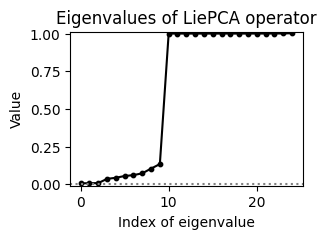

Partitions generating an orbit that spans the whole ambient space: 1 out of 3 - [(5,)]
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 3/3. Duration 0:00:01. Remaining 0:00:00.
The optimal rep found is (5,) with cost 5.094e-02.
    ((5,), '-1') - cost 5.094e-02 (best cost #1/6)
    ((5,), '+1') - cost 5.094e-02 (best cost #2/6)
    ((1, 1, 3), '-1') - cost 2.832e+00 (best cost #3/6)
    ((1, 1, 3), '+1') - cost 2.832e+00 (best cost #4/6)
    ((1, 4), '+1') - cost 3.915e+00 (best cost #5/6)
    ((1, 4), '-1') - cost 3.915e+00 (best cost #6/6)
The representations (5,) and (5,) are equivalent.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1109


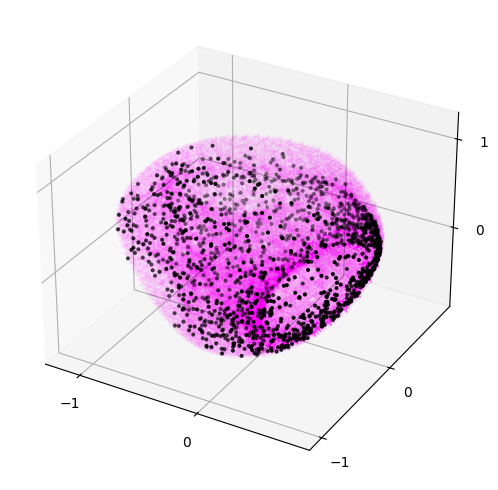

In [19]:
''' Algorithm on the representations of SU(2) in R^5 - [5] '''

' Generate dataset '

# Parameters
group = 'SU(2)'  # compact Lie group considered
ambient_dim = 5  # ambient dimension
dim = 3  # dimension of the group/orbit
n_points = 1500  # number of sample points

# Generate dataset
Frequencies = (5,)
X = sample_orbit_from_rep(group="SU(2)", nb_points=n_points, rep_type=Frequencies, verbose=True)

' Lie-PCA '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Print eigenvalues
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
print('Eigenvalues:', vals)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/Example_SO3_R5_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

' LieDetect '

# Find frequencies
frequency_max = 2
method = 'bottom_lie_pca'
FrequenciesToTest = [tuple(f) for f in get_constrained_partitions("SU(2)", ambient_dim)]
FrequenciesToTestMaximal = [f for f in FrequenciesToTest if len(np.unique(f)) == len(f) and 1 not in f]
print('Partitions generating an orbit that spans the whole ambient space:', len(FrequenciesToTestMaximal), 'out of',
      len(FrequenciesToTest), '-', FrequenciesToTestMaximal)
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, reps_to_test=FrequenciesToTest,
                                                             method=method, verbose=True, verbose_top_scores=True)
# Check if found frequencies are correct
are_representations_equivalent("SU(2)", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show();

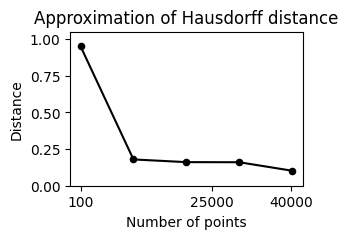

In [20]:
# Plot Hausdorff distances

HausdorffDistances = {}
# for n_points_orbit in range(100,100000,10000):
for n_points_orbit in range(100, 50000, 10000):
    # Generate estimated orbit
    x = X[0, :]  #initial point of X
    Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    HausdorffDistances[n_points_orbit] = Hausdorff

fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
x, y = list(HausdorffDistances.keys()), list(HausdorffDistances.values())
ax.plot(x, y, c='black', label='_nolegend_')
ax.scatter(x, y, c='black', label='_nolegend_', s=20)
ax.set_ylim((-0.0, np.max(y) + 0.1))
ax.set_xticks([100, 25000, 40000])
ax.set_title('Approximation of Hausdorff distance')
ax.set_xlabel('Number of points')
ax.set_ylabel('Distance')
plt.show()
fig.savefig('figures/Example_SO3_R5_Hausdorff.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.9

Sampled 3000 random points on the orbit of SU(2) with rep (3, 4).


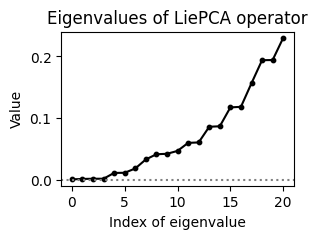

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 2/2. Duration 0:00:03. Remaining 0:00:00.
The optimal rep found is (7,) with cost 1.545e+00.
    ((7,), '-1') - cost 1.545e+00 (best cost #1/4)
    ((7,), '+1') - cost 1.764e+00 (best cost #2/4)
    ((3, 4), '-1') - cost 1.985e+00 (best cost #3/4)
    ((3, 4), '+1') - cost 3.315e+00 (best cost #4/4)
The representations (3, 4) and (7,) are not equivalent.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.4239


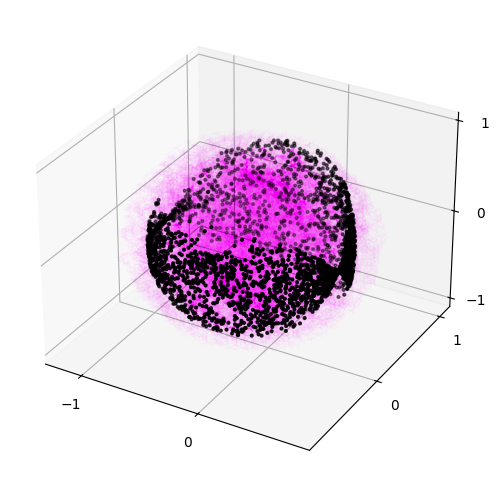

In [21]:
''' Algorithm on the representations of SU(2) in R^7 - [3,4] '''

# Parameters
group = 'SU(2)'  # compact Lie group considered
ambient_dim = 7  # ambient dimension
dim = 3  # dimension of the group/orbit
n_points = 3000  # number of sample points

# Generate dataset
Frequencies = (3, 4)
X = sample_orbit_from_rep("SU(2)", nb_points=n_points, rep_type=Frequencies, verbose=True)

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i + 1, ambient_dim):
        A = np.zeros((ambient_dim, ambient_dim))
        A[i, j], A[j, i] = 1, -1
        Basis.append(A)
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim, ambient_dim)) for A in SigmaSkew]
SigmaSkew = [skew_sym_to_vect((A - A.T) / 2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/Example_SU2_R7_34_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

' LieDetect '

# Find frequencies
method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, ambient_dim, method=method,
                                                             verbose=True, verbose_top_scores=True)

# Check if found frequencies are correct
are_representations_equivalent("SU(2)", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_SU2_R7_34.png', dpi=fig.dpi, bbox_inches='tight')

Sampled 3000 random points on the orbit of SU(2) with rep (7,).


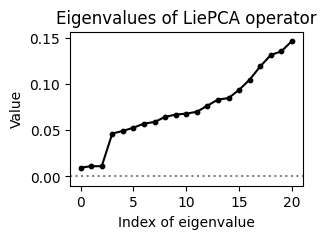

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 2/2. Duration 0:00:01. Remaining 0:00:00.
The optimal rep found is (7,) with cost 4.266e-03.
    ((7,), '+1') - cost 4.266e-03 (best cost #1/4)
    ((7,), '-1') - cost 4.266e-03 (best cost #2/4)
    ((3, 4), '-1') - cost 3.178e+00 (best cost #3/4)
    ((3, 4), '+1') - cost 3.185e+00 (best cost #4/4)
The representations (7,) and (7,) are equivalent.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1809


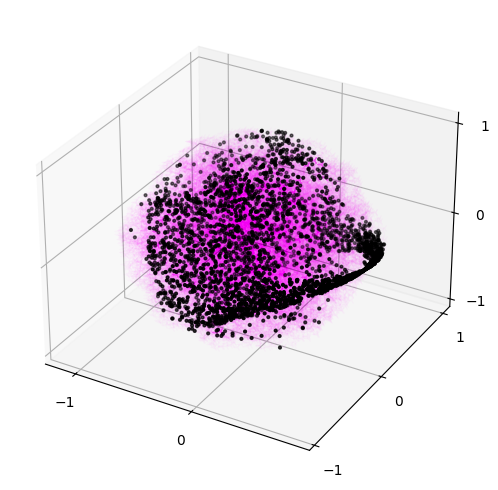

In [22]:
''' Algorithm on the representations of SU(2) in R^7 - [7] '''

# Parameters
group = 'SU(2)'  # compact Lie group considered
ambient_dim = 7  # ambient dimension
dim = 3  # dimension of the group/orbit
n_points = 3000  # number of sample points

# Generate dataset
Frequencies = (7,)
X = sample_orbit_from_rep("SU(2)", nb_points=n_points, rep_type=Frequencies, verbose=True)

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i + 1, ambient_dim):
        A = np.zeros((ambient_dim, ambient_dim))
        A[i, j], A[j, i] = 1, -1
        Basis.append(A)
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim, ambient_dim)) for A in SigmaSkew]
SigmaSkew = [skew_sym_to_vect((A - A.T) / 2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/Example_SU2_R7_7_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

' LieDetect '

# Find frequencies
method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, ambient_dim, method=method,
                                                             verbose=True, verbose_top_scores=True)

# Check if found frequencies are correct
are_representations_equivalent("SU(2)", Frequencies, OptimalFrequencies, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_SU2_R7_7.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.10

In [23]:
''' Algorithm on the representations of SU(2) in R^11 '''

for frequencies in [(3, 8), (4, 7), (11,)]:
    ' Generate dataset '

    # Parameters
    group = 'SU(2)'  # compact Lie group considered
    ambient_dim = 11  # ambient dimension
    dim = 3  # dimension of the group/orbit
    n_points = 5000  # number of sample points

    # Generate dataset
    Frequencies = frequencies
    X = sample_orbit_from_rep("SU(2)", nb_points=n_points, rep_type=Frequencies, verbose=True)

    ' Lie-PCA  '

    n_neighbors = 30
    method = 'PCA'
    Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, verbose=True)

    ' LieDetect '

    # Find frequencies
    method = 'bottom_lie_pca'
    OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, verbose=True,
                                                                 verbose_top_scores=True)

    # Check if found frequencies are correct
    are_representations_equivalent("SU(2)", Frequencies, OptimalFrequencies, verbose=True)

    ' Plot orbit '

    # Generate estimated orbit
    n_points_orbit = 50 ** 3
    x = X[0, :]  #initial point of X
    Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

    # Compute non-symmetric Hausdorff
    Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
    print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

Sampled 5000 random points on the orbit of SU(2) with rep (3, 8).
Lie PCA first eigenvalues: 8.7e-04  1.4e-03  1.4e-03  1.2e-02  Eigengap #3: 8.2e+00.
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 5/5. Duration 0:00:12. Remaining 0:00:00.
The optimal rep found is (3, 8) with cost 4.899e-03.
    ((3, 8), '-1') - cost 4.899e-03 (best cost #1/10)
    ((3, 8), '+1') - cost 4.899e-03 (best cost #2/10)
    ((3, 3, 5), '+1') - cost 8.184e-01 (best cost #3/10)
    ((3, 3, 5), '-1') - cost 8.289e-01 (best cost #4/10)
    ((4, 7), '+1') - cost 2.277e+00 (best cost #5/10)
    ((4, 7), '-1') - cost 2.299e+00 (best cost #6/10)
    ((11,), '-1') - cost 2.486e+00 (best cost #7/10)
    ((11,), '+1') - cost 2.488e+00 (best cost #8/10)
    ((3, 4, 4), '+1') - cost 2.706e+00 (best cost #9/10)
    ((3, 4, 4), '-1') - cost 2.723e+00 (best cost #10/10)
The representations (3, 8) and (3, 8) are equivalent.
Non-symmetric Hausdorff distance from X to est

## Example 4.11

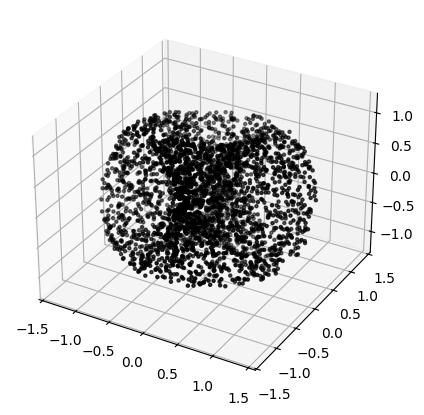

PCA eigenvalues: [np.float64(0.1535306649710638), np.float64(0.15983677473091168), np.float64(0.16582254855600045), np.float64(0.16912787877105417), np.float64(0.17466440449225057), np.float64(0.17701772847871936)]
Lie PCA first eigenvalues: 1.3e-03  1.5e-03  1.5e-03  1.6e-03  Eigengap #3: 1.0e+00.


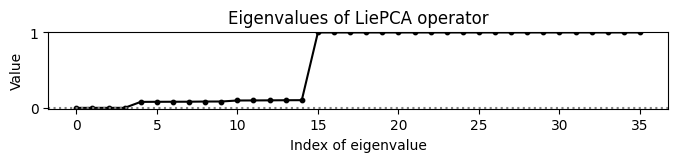

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (3, 3) with cost 2.000e+00.
    ((3, 3), '-1') - cost 2.000e+00 (best cost #1/2)
    ((3, 3), '+1') - cost 2.000e+00 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1185


In [24]:
''' Algorithm with SU(2) on the Stiefel manifold V(2,3) embedded in R^6 '''

# Parameters
ambient_dim = 6  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 3000  # number of sample points

# Sample on Stiefel manifold and plot
X = np.random.multivariate_normal([0] * 6, cov=np.eye(6), size=n_points)
X = [x.reshape((3, 2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]
X = np.array([x.flatten() for x in X])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim)
pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()

' LieDetect '

method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, verbose=True,
                                                             verbose_top_scores=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

## Example 4.12

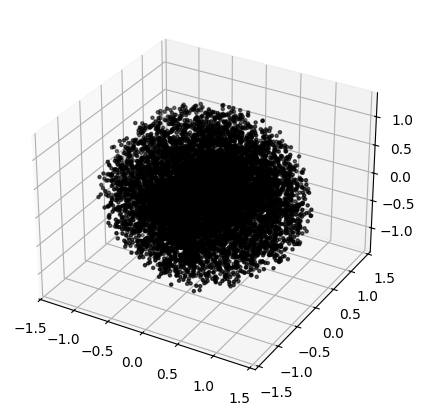

PCA eigenvalues: [np.float64(0.119546503976939), np.float64(0.12143934073538781), np.float64(0.1226980704699162), np.float64(0.12411517709923747), np.float64(0.1254666969189949), np.float64(0.12629669620420994), np.float64(0.1291842001765616), np.float64(0.13125331441875307)]
Lie PCA first eigenvalues: 2.5e-03  2.6e-03  2.7e-03  2.7e-03  Eigengap #5: 1.0e+00.


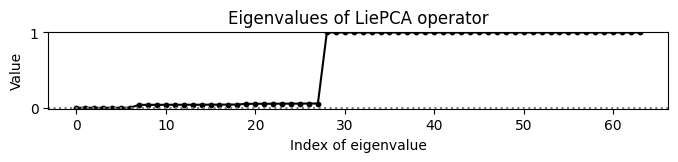

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:01. Remaining 0:00:00.
The optimal rep found is (4, 4) with cost 3.973e+00.
    ((4, 4), '-1') - cost 3.973e+00 (best cost #1/2)
    ((4, 4), '+1') - cost 4.452e+00 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 1.9357
Non-symmetric Hausdorff distance from estimated orbit to X: 1.0359


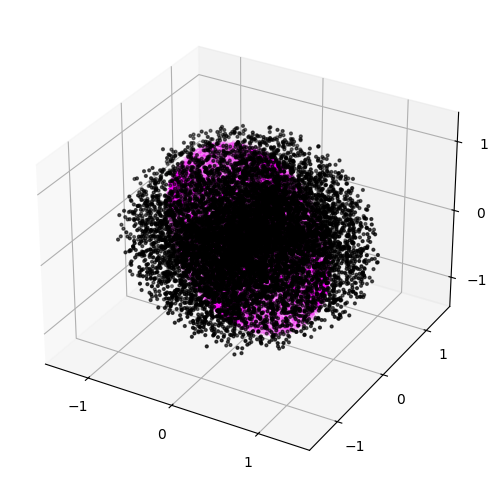

In [25]:
''' Algorithm with SU(2) on the Stiefel manifold V(2,4) embedded in R^8 '''

# Parameters
ambient_dim = 8  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 10000  # number of sample points

# Sample on Stiefel manifold and plot
X = np.random.multivariate_normal([0] * ambient_dim, cov=np.eye(ambient_dim), size=n_points)
X = [x.reshape((4, 2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]
X = np.array([x.flatten() for x in X])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim)
pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 50
dim_orbit = 5
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim_orbit, method=method, verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()

' LieDetect '

# Find frequencies
method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, reps_to_test=[(4, 4)],
                                                             verbose=True, verbose_top_scores=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_V24_R8.png', dpi=fig.dpi, bbox_inches='tight')

In [26]:
' Compute full orbit '

AllHausdorffDistance = []
n_points_orbit = 20 ** 3

for x in X:
    Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    AllHausdorffDistance.append(Hausdorff)

print('Maximal non-symmetric Hausdorff distance from estimated orbit to X:', round(max(AllHausdorffDistance), 4))

Maximal non-symmetric Hausdorff distance from estimated orbit to X: 1.0931


## Example 4.13

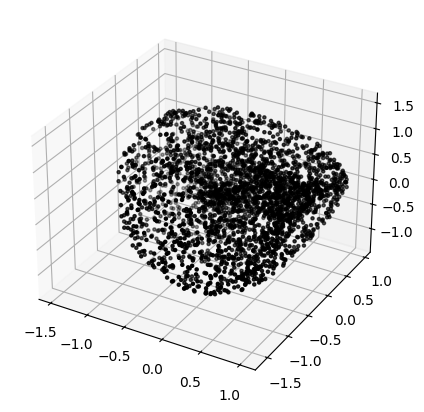

PCA eigenvalues: [np.float64(0.10067037314630047), np.float64(0.10577743108293472), np.float64(0.10671856849944664), np.float64(0.11003474474646967), np.float64(0.11136134643809968), np.float64(0.11402594063204505), np.float64(0.11587286170911958), np.float64(0.11712859450300915), np.float64(0.11841013924257489)]
Lie PCA first eigenvalues: 8.5e-04  9.0e-04  9.1e-04  9.5e-04  Eigengap #3: 1.0e+00.


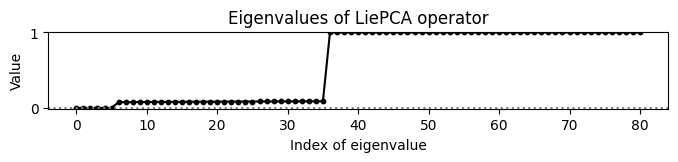

----> Optimization problem via full_lie_pca method for SU(2)  <----
Solve minimization problem... It 3/3. Duration 0:07:44. Remaining 0:00:00.
The optimal rep found is (3, 3, 3) with cost 2.399e-05.
    ((3, 3, 3), '-1') - cost 2.399e-05 (best cost #1/6)
    ((3, 3, 3), '+1') - cost 2.399e-05 (best cost #2/6)
    ((4, 5), '-1') - cost 1.403e-02 (best cost #3/6)
    ((4, 5), '+1') - cost 1.442e-02 (best cost #4/6)
    ((9,), '+1') - cost 2.629e-01 (best cost #5/6)
    ((9,), '-1') - cost 2.663e-01 (best cost #6/6)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.147
Non-symmetric Hausdorff distance from estimated orbit to X: 0.5931


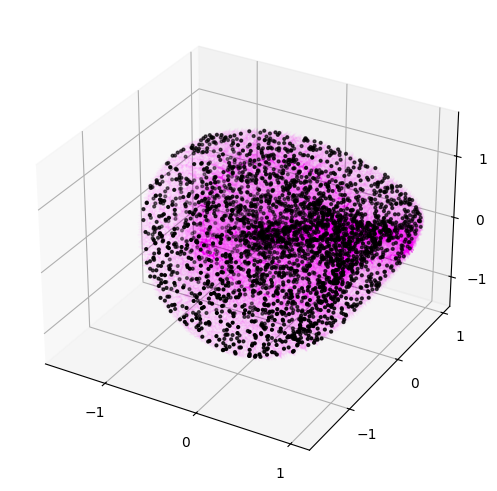

In [27]:
''' Algorithm with SU(2) on SO(3) embedded in R^9 '''

# Parameters
ambient_dim = 9  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 3000  # number of sample points

# Sample on SO(3)
X = np.array([scipy.stats.special_ortho_group.rvs(dim=3).flatten() for i in range(n_points)])
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

# Print PCA eigenvalues
pca = sklearn.decomposition.PCA(n_components=ambient_dim)
pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))

' Lie-PCA  '

n_neighbors = 50
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, verbose=True)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(Sigma)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=10)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()

' LieDetect '

# Find frequencies
method = 'full_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, verbose=True,
                                                             verbose_top_scores=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_SO3_R9_35.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via full_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:50. Remaining 0:00:00.
The optimal rep found is (3, 3, 3) with cost 2.392e-05.
    ((3, 3, 3), '-1') - cost 2.392e-05 (best cost #1/2)
    ((3, 3, 3), '+1') - cost 2.392e-05 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1487
Non-symmetric Hausdorff distance from estimated orbit to X: 0.5832


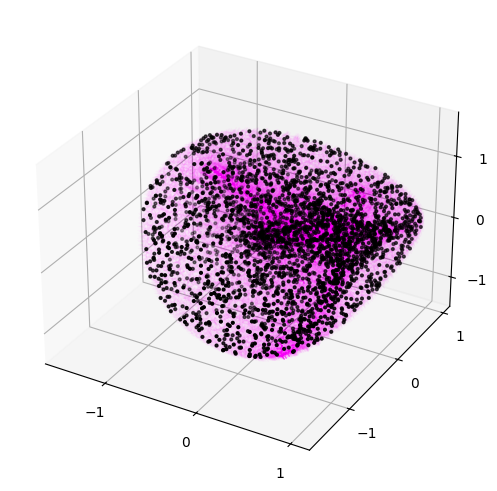

In [28]:
''' Test with other representation [3,3,3] '''

' LieDetect '

# Find frequencies
method = 'full_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, reps_to_test=[(3, 3, 3)],
                                                             method=method, verbose=True, verbose_top_scores=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_SO3_R9_333.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.14

Shape of X: (5000, 16)


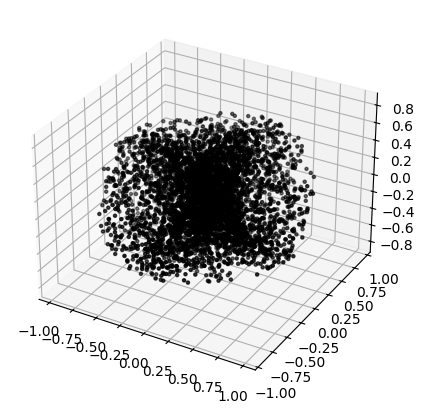

PCA eigenvalues: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(4.0470656005484595e-18), np.float64(1.1171229558871948e-17), np.float64(1.9121587197351006e-17), np.float64(0.10427802466515942), np.float64(0.10600247263067639), np.float64(0.10694576877961004), np.float64(0.10859165620868612), np.float64(0.11049893368961776), np.float64(0.112539710725676), np.float64(0.11387652351373188), np.float64(0.11627578057923048), np.float64(0.12099112920761199)]
Projection in dimension 9 - PCA eigenvalues: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(4.0470656005484595e-18), np.float64(1.1171229558871948e-17), np.float64(1.9121587197351006e-17), np.float64(0.10427802466515942), np.float64(0.10600247263067639), np.float64(0.10694576877961004), np.float64(0.10859165620868612), np.float64(0.11049893368961776), np.float64(0.112539710725676), np.float64(0.11387652351373188), np.float64(0.11627578057923048), np.float64(0.12099112920761

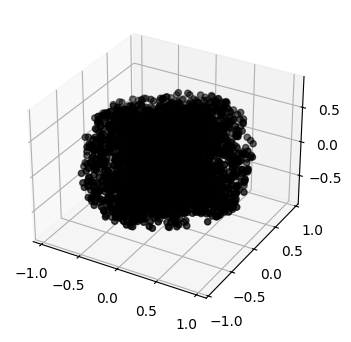

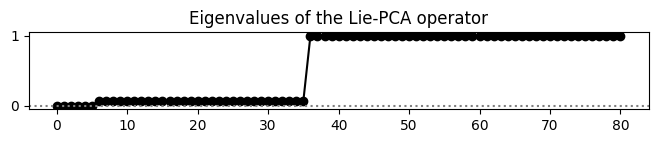

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 2/2. Duration 0:00:02. Remaining 0:00:00.
The optimal rep found is (1, 3, 5) with cost 1.811e+00.
    ((1, 3, 5), '-1') - cost 1.811e+00 (best cost #1/4)
    ((1, 3, 5), '+1') - cost 1.820e+00 (best cost #2/4)
    ((3, 3, 3), '-1') - cost 3.099e+00 (best cost #3/4)
    ((3, 3, 3), '+1') - cost 3.100e+00 (best cost #4/4)
Non-symmetric Hausdorff distance from X to estimated orbit: 1.1045
Non-symmetric Hausdorff distance from estimated orbit to X: 0.4246


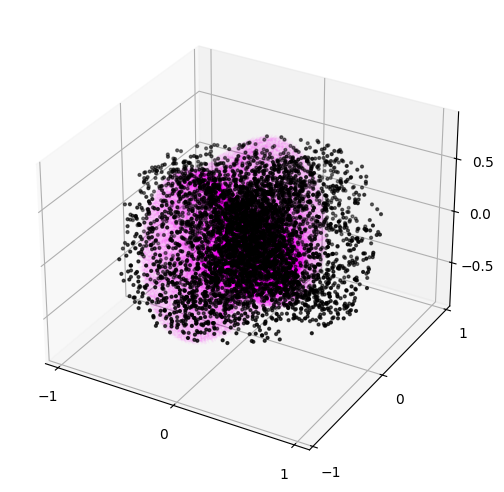

In [29]:
''' Algorithm with SU(2) on the Grassmann manifold G(2,4) embedded in R^16 '''

# Parameters
ambient_dim = 16  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 5000  # number of sample points

# Sample on Grassmann manifold and plot
X = np.random.multivariate_normal([0] * 8, cov=np.eye(8), size=n_points)
X = [x.reshape((4, 2)) for x in X]
X = [x @ scipy.linalg.sqrtm(np.linalg.inv(x.T @ x)) for x in X]  # Gram-Schmidt
X = [np.outer(x[:, 0], x[:, 0]) + np.outer(x[:, 1], x[:, 1]) for x in X]  # Projection
X = np.array([x.flatten() for x in X])
print('Shape of X:', np.shape(X))
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

# Prune small PCA eigenvalues
eps_pca = 1e-10
pca = sklearn.decomposition.PCA(n_components=ambient_dim)
pca.fit(X)
print('PCA eigenvalues:', sorted(pca.explained_variance_ratio_))
dim_pca = sum(pca.explained_variance_ratio_ > eps_pca)

if dim_pca < ambient_dim:
    print('Projection in dimension', dim_pca, '- PCA eigenvalues:', sorted(pca.explained_variance_ratio_))
    # Dimension reduction via PCA
    pca = sklearn.decomposition.PCA(n_components=dim_pca)
    X = pca.fit_transform(X)
    ambient_dim = dim_pca

    # Plot new orbit
    pca = sklearn.decomposition.PCA(n_components=3)
    Xpca = pca.fit_transform(X)
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black')
    plt.show()

' Lie-PCA '

n_neighbors = 50
dim_orbit = 4
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim_orbit, method=method)

# Plot Lie-PCA operator
vals, vecs = np.linalg.eig(Sigma)
vals = np.sort(np.real(vals))
fig = plt.figure(figsize=(8, 1))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black')
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.05, max(vals) + 0.05))
ax.set_title('Eigenvalues of the Lie-PCA operator')
plt.show()

' Project on Lie subalgebras '

method = 'bottom_lie_pca'
# Find frequencies
FrequenciesToTest = [tuple([3, 3, 3]), tuple([1, 3, 5])]
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, frequency_max=None, method=method,
                                                             verbose=True, verbose_top_scores=True,
                                                             reps_to_test=FrequenciesToTest)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Example_G24_R16.png', dpi=fig.dpi, bbox_inches='tight')

In [30]:
' Compute full orbit '

AllHausdorffDistance = []
n_points_orbit = 20 ** 3

for x in X:
    Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)
    Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
    AllHausdorffDistance.append(Hausdorff)

print('Maximal non-symmetric Hausdorff distance from estimated orbit to X:', round(max(AllHausdorffDistance), 4))

Maximal non-symmetric Hausdorff distance from estimated orbit to X: 0.4534


# Section 4.4.1: Application of the algorithm for a list of groups

## Example 4.15, dimension 6

Sampled 1500 random points on the orbit of SU(2) with rep (1, 5).


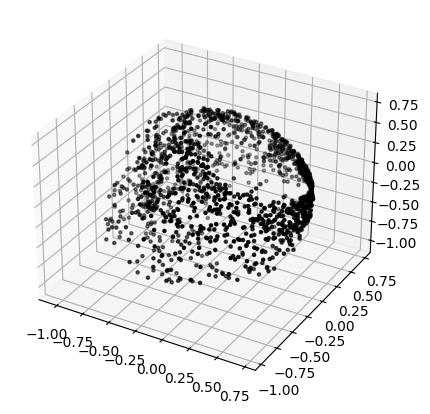

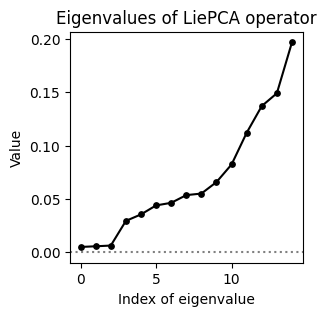

In [31]:
' Generate dataset '

# Parameters
ambient_dim = 6  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 1500  # number of sample points

# Generate dataset and plot
Frequencies = (1, 5)
X = sample_orbit_from_rep(group, nb_points=n_points, rep_type=Frequencies, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i + 1, ambient_dim):
        A = np.zeros((ambient_dim, ambient_dim))
        A[i, j], A[j, i] = 1, -1
        Basis.append(A)
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim, ambient_dim)) for A in SigmaSkew]
SigmaSkew = [skew_sym_to_vect((A - A.T) / 2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=15)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/distinguish_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((0, 0, -1), (0, -1, 0), (-1, 0, 0)) with cost 4.649e-16.
Non-symmetric Hausdorff distance from X to estimated orbit: 1.2719


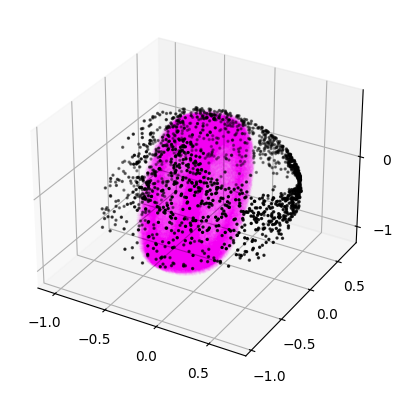

In [32]:
' Project on Lie subalgebras - T3 '

# Find frequencies
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=1, method=method,
                                                             verbose=True)

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=2)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/distinguish_T3.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (1, 5) with cost 3.368e-02.
    ((1, 5), '-1') - cost 3.368e-02 (best cost #1/2)
    ((1, 5), '+1') - cost 3.368e-02 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1016


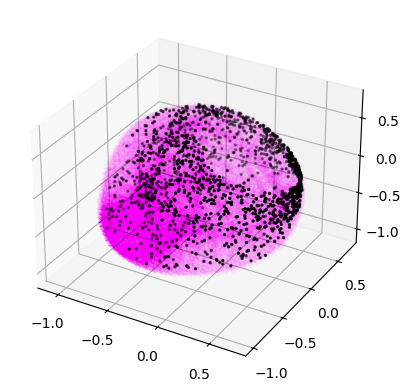

In [33]:
' Project on Lie subalgebras - SU(2) '

method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, reps_to_test=[(1, 5)],
                                                             verbose=True, verbose_top_scores=True)

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=2)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/distinguish_SU2.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.15, dimension 8

Sampled 5000 random points on the orbit of SU(2) with rep (3, 5).


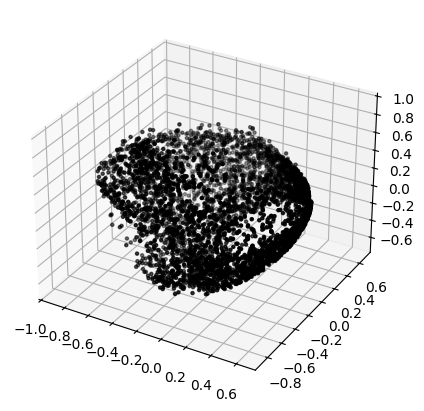

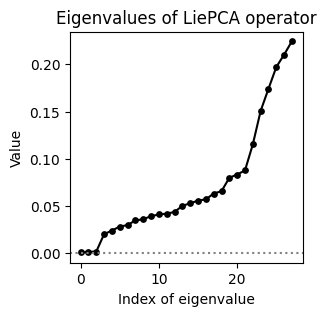

In [34]:
' Generate dataset '

# Parameters
ambient_dim = 8  # ambient dimension
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
n_points = 5000  # number of sample points

# Generate dataset and plot
Frequencies = (3, 5)
X = sample_orbit_from_rep(group, nb_points=n_points, rep_type=Frequencies, verbose=True)
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 30
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i + 1, ambient_dim):
        A = np.zeros((ambient_dim, ambient_dim))
        A[i, j], A[j, i] = 1, -1
        Basis.append(A)
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim, ambient_dim)) for A in SigmaSkew]
SigmaSkew = [skew_sym_to_vect((A - A.T) / 2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=15)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/distinguish_LiePCA_dim8.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((0, 0, -1, 0), (0, -1, 0, 1), (-1, -1, 0, 0)) with cost 4.929e-01.
Non-symmetric Hausdorff distance from X to estimated orbit: 1.1969


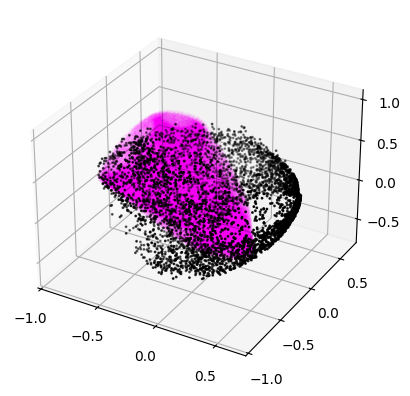

In [35]:
' Project on Lie subalgebras -T3 '

# Find frequencies
method = 'abelian'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=1, method=method,
                                                             verbose=True)

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=1)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/distinguish_T3_dim8.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (3, 5) with cost 2.072e-03.
    ((3, 5), '+1') - cost 2.072e-03 (best cost #1/2)
    ((3, 5), '-1') - cost 2.072e-03 (best cost #2/2)
Non-symmetric Hausdorff distance from X to estimated orbit: 0.1223


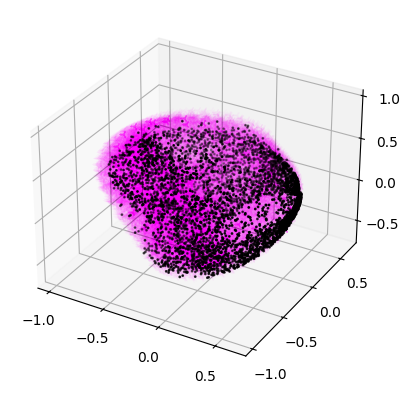

In [36]:
' Project on Lie subalgebras - SU(2) '

method = 'bottom_lie_pca'
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('SU(2)', Sigma, dim, method=method, reps_to_test=[(3, 5)],
                                                             verbose=True, verbose_top_scores=True)

# Generate estimated orbit
n_points_orbit = 50 ** 3
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("SU(2)", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x)

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=1)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.01, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/distinguish_SU2_dim8.png', dpi=fig.dpi, bbox_inches='tight')

## Example 4.16

In [37]:
def SampleOnMobiusStrip(N_points_init, N_points_subsample):
    r = 1  #parameter

    # Draw sample from uniform distribution
    Sample = []
    Angles = np.array([np.random.uniform(0, 2 * np.pi, N_points_init) for i in range(2)])
    for i in range(N_points_init):
        theta, phi = Angles[:, i]
        s = np.array(
            [np.cos(theta), np.sin(theta), r * np.cos(phi) * np.cos(theta / 2), r * np.cos(phi) * np.sin(theta / 2)])
        Sample.append(s)

    # Subsample with gudhi    
    Sample = np.array(gudhi.subsampling.choose_n_farthest_points(points=Sample, nb_points=N_points_subsample))

    return Sample

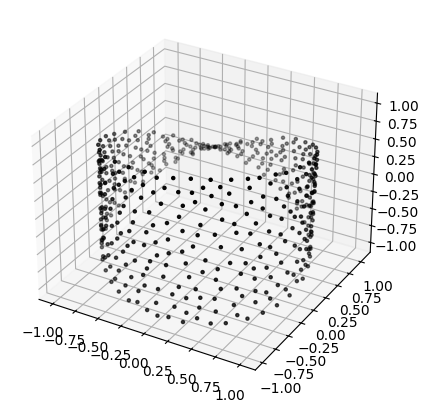

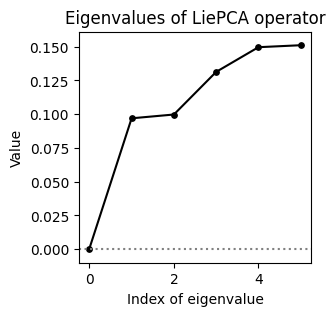

In [38]:
' Generate dataset '

dim = 2
ambient_dim = 4

# Generate sample
N_points_init, N_points_subsample = 10000, 500
X = SampleOnMobiusStrip(N_points_init, N_points_subsample)

# Plot
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=5)
plt.show()

' Lie-PCA on skew-symmetric matrices '

n_neighbors = 15
method = 'PCA'
Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method)

# Define Lie-PCA operator on skew-symmetric matrices
Basis = []
for i in range(ambient_dim):
    for j in range(i + 1, ambient_dim):
        A = np.zeros((ambient_dim, ambient_dim))
        A[i, j], A[j, i] = 1, -1
        Basis.append(A)
SigmaSkew = [Sigma @ A.flatten() for A in Basis]
SigmaSkew = [A.reshape((ambient_dim, ambient_dim)) for A in SigmaSkew]
SigmaSkew = [skew_sym_to_vect((A - A.T) / 2) for A in SigmaSkew]
SigmaSkew = np.array(SigmaSkew)

# Plot Lie-PCA operator
vals = np.sort(np.real(np.linalg.eig(SigmaSkew)[0]))  #find eigenvalues and vectors of sigma as a matrix
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
ax.plot(range(len(vals)), vals, c='black')
ax.scatter(range(len(vals)), vals, c='black', s=15)
ax.axhline(0, color='grey', linestyle='dotted')
ax.set_ylim((0 - 0.01, max(vals) + 0.01))
ax.set_title('Eigenvalues of LiePCA operator')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Value')
plt.show()
fig.savefig('figures/Mobius_LiePCA.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((0, -1), (-1, 0)) with cost 0.000e+00.
Non-symmetric Hausdorff distance from X to estimated orbit: 1.0595


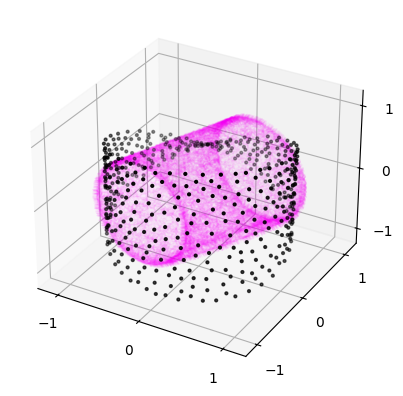

In [39]:
' LieDetect - T^2 '

# Find frequencies
dim = 2  # dimension of the torus
ambient_dim = 4
method = 'abelian'
frequency_max = 2
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100 ** 2
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='random')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=0.5, alpha=0.05, marker="3")
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Mobius_T2.png', dpi=fig.dpi, bbox_inches='tight')

----> Optimization problem via abelian method for torus  <----
The optimal rep found is ((1, 2),) with cost 1.189e-02.
Non-symmetric Hausdorff distance from X to estimated orbit: 0.5529
Non-symmetric Hausdorff distance from estimated orbit to X: 0.1359


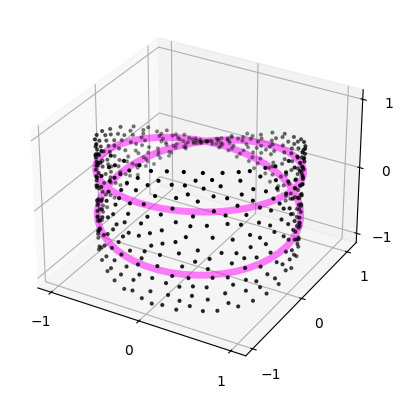

In [40]:
' LieDetect - SO(2) '

# Find frequencies
dim = 1
ambient_dim = 4
method = 'abelian'
frequency_max = 2
OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra('torus', Sigma, dim, frequency_max=frequency_max,
                                                             method=method, verbose=True)

' Plot orbit '

# Generate estimated orbit
n_points_orbit = 100
x = X[0, :]  #initial point of X
Orbit = sample_orbit_from_algebra("torus", OptimalFrequencies, OptimalLieAlgebra, nb_points=n_points_orbit, x=x,
                                  method='uniform')

# Compute non-symmetric Hausdorff
Hausdorff = scipy.spatial.distance.directed_hausdorff(X, Orbit)[0]
print('Non-symmetric Hausdorff distance from X to estimated orbit:', round(Hausdorff, 4))
Hausdorff = scipy.spatial.distance.directed_hausdorff(Orbit, X)[0]
print('Non-symmetric Hausdorff distance from estimated orbit to X:', round(Hausdorff, 4))

# Plot orbit
pca = sklearn.decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(X)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c='black', s=4)
Orbitpca = pca.transform(Orbit)
ax.plot(Orbitpca[:, 0], Orbitpca[:, 1], Orbitpca[:, 2], c='magenta', lw=5, alpha=0.5)
plt.locator_params(nbins=4)
plt.tight_layout()
plt.show()
fig.savefig('figures/Mobius_SO2.png', dpi=fig.dpi, bbox_inches='tight')

# Section 4.4.2: Typical distance between orbits

In [41]:
ambient_dim_max = 10

In [42]:
' SO(2) '

# Parameters
dim = 1  # dimension of the torus (here, circle)
n_points = 500  # number of sample points

Distances_SO2_sym = []
Distances_SO2_nonsym = []
for ambient_dim in range(4, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim, 1))
    for i in range(int(ambient_dim / 2)): x[2 * i, 0] = 1
    x /= np.linalg.norm(x)
    x = x[:, 0]

    # Get frequencies to test
    frequency_max = ambient_dim
    # frequency_max = int(ambient_dim/2)+4
    FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                     method="orbit-equivalence", verbose=False)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
        LieAlgebra = get_canonical_pushforward_algebra("torus", frequencies)
        Orbit = sample_orbit_from_algebra("torus", frequencies, LieAlgebra, nb_points=n_points, x=x, method='uniform')
        Orbits.append(Orbit)
    print('Orbits found', end=' - ')

    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i + 1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            # Distances[i,j] = max(Dij,Dji)
            Distances_sym.append(max(Dij, Dji))
            Distances_nonsym.append(min(Dij, Dji))
    print('Distances found', end=' \n')

    Distances_SO2_sym.append([ambient_dim, min(Distances_sym)])
    Distances_SO2_nonsym.append([ambient_dim, min(Distances_nonsym)])

' T2 '

# Parameters
dim = 2  # dimension of the torus
n_points = 35  # number of sample points
method = 'exact'
frequency_max = 2

Distances_T2_sym = []
Distances_T2_nonsym = []
for ambient_dim in range(6, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim, 1))
    for i in range(int(ambient_dim / 2)): x[2 * i, 0] = 1
    x /= np.linalg.norm(x)
    x = x[:, 0]

    # Get frequencies to test
    FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                     method="orbit-equivalence", verbose=False)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
        LieAlgebra = get_canonical_pushforward_algebra("torus", frequencies)
        # LieAlgebra = gram_schmidt_orthonormalization(LieAlgebra)
        Orbit = sample_orbit_from_algebra("torus", frequencies, LieAlgebra, nb_points=n_points ** 2, x=x,
                                          method='uniform')
        Orbits.append(Orbit)
    print('Orbits found', end=' - ')

    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i + 1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            Distances_sym.append(max(Dij, Dji))
            Distances_nonsym.append(min(Dij, Dji))
    print('Distances found', end=' \n')

    Distances_T2_sym.append([ambient_dim, min(Distances_sym)])
    Distances_T2_nonsym.append([ambient_dim, min(Distances_nonsym)])

' T3 '

# Parameters
dim = 3  # dimension of the torus
n_points = 30  # number of sample points
method = 'exact'
frequency_max = 1

Distances_T3_sym = []
Distances_T3_nonsym = []
for ambient_dim in range(8, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    # Define origin Euclidean vector x
    x = np.zeros((ambient_dim, 1))
    for i in range(int(ambient_dim / 2)): x[2 * i, 0] = 1
    x /= np.linalg.norm(x)
    x = x[:, 0]

    # Get frequencies to test
    FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                     method="orbit-equivalence", verbose=False)
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    # Generate orbits
    Orbits = list()
    for frequencies in FrequenciesToTest:
        LieAlgebra = get_canonical_pushforward_algebra("torus", frequencies)
        # LieAlgebra = gram_schmidt_orthonormalization(LieAlgebra)
        Orbit = sample_orbit_from_algebra("torus", frequencies, LieAlgebra, nb_points=n_points ** 3, x=x,
                                          method='uniform')
        Orbits.append(Orbit)
    print('Orbits found', end=' - ')

    # Compute Hausdorff distances
    Distances_sym = list()
    Distances_nonsym = list()
    for i in range(len(FrequenciesToTest)):
        for j in range(i + 1, len(FrequenciesToTest)):
            Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
            Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
            Distances_sym.append(max(Dij, Dji))
            Distances_nonsym.append(min(Dij, Dji))
    print('Distances found', end=' \n')

    Distances_T3_sym.append([ambient_dim, min(Distances_sym)])
    Distances_T3_nonsym.append([ambient_dim, min(Distances_nonsym)])

' SU(2) '

# Parameters
group = 'SU(2)'  # Lie group considered
dim = 3  # dimension of the group
dim_orbit = 3  # dimension of the orbit
n_points = 30  # number of sample points

Distances_SU2_sym = []
Distances_SU2_nonsym = []
for ambient_dim in range(4, ambient_dim_max + 2):
    print('Ambient dim', ambient_dim, end=' - ')

    # Define origin Euclidean vector x
    # x = np.zeros((ambient_dim, 1))
    # for i in range(int(ambient_dim / 2)): x[2 * i, 0] = 1
    x = np.ones((ambient_dim, 1))
    x /= np.linalg.norm(x)
    x = x[:, 0]

    # Get frequencies to test
    FrequenciesToTest = get_constrained_partitions("SU(2)", ambient_dim)
    FrequenciesToTest = [f for f in FrequenciesToTest if len(np.unique(f)) == len(f) and 1 not in f]
    print('Frequencies found:', len(FrequenciesToTest), end=' - ')

    if len(FrequenciesToTest) > 1:
        # Generate orbits
        Orbits = list()
        for frequencies in FrequenciesToTest:
            LieAlgebra = get_canonical_pushforward_algebra("SU(2)", frequencies)
            Orbit = sample_orbit_from_algebra("SU(2)", frequencies, LieAlgebra, nb_points=n_points, x=x)
            Orbits.append(Orbit)
        print('Orbits found', end=' - ')

        # Compute Hausdorff distances
        Distances_sym = list()
        Distances_nonsym = list()
        for i in range(len(FrequenciesToTest)):
            for j in range(i + 1, len(FrequenciesToTest)):
                Dij = scipy.spatial.distance.directed_hausdorff(Orbits[i], Orbits[j])[0]
                Dji = scipy.spatial.distance.directed_hausdorff(Orbits[j], Orbits[i])[0]
                Distances_sym.append(max(Dij, Dji))
                Distances_nonsym.append(min(Dij, Dji))
        print('Distances found', end=' \n')
        Distances_SU2_sym.append([ambient_dim, min(Distances_sym)])
        Distances_SU2_nonsym.append([ambient_dim, min(Distances_nonsym)])
    else:
        print('')

Ambient dim 4 - Frequencies found: 5 - Orbits found - Distances found 
Ambient dim 6 - Frequencies found: 19 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 69 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 251 - Orbits found - Distances found 
Ambient dim 6 - Frequencies found: 9 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 19 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 21 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 3 - Orbits found - Distances found 
Ambient dim 10 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 4 - Frequencies found: 1 - 
Ambient dim 5 - Frequencies found: 1 - 
Ambient dim 6 - Frequencies found: 0 - 
Ambient dim 7 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 8 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 9 - Frequencies found: 2 - Orbits found - Distances found 
Ambient dim 10 - Fr

minima symmetric: 0.3952531131499827


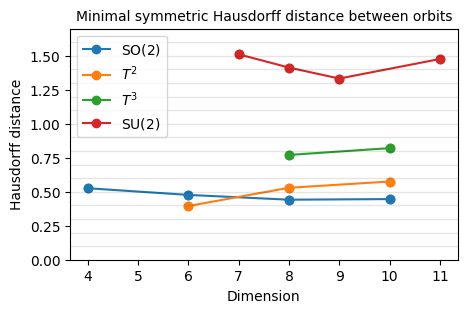

In [43]:
' Plot results - symmetric Hausdorff '

fig = plt.figure(figsize=(5, 3))

minima = np.min(np.concatenate(
    [np.array(Distances_SO2_sym)[:, 1], np.array(Distances_T2_sym)[:, 1], np.array(Distances_T3_sym)[:, 1],
     np.array(Distances_SU2_sym)[:, 1]]))
print('minima symmetric:', minima)

y = np.array(Distances_SO2_sym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$\mathrm{SO}(2)$')

y = np.array(Distances_T2_sym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$T^2$')

y = np.array(Distances_T3_sym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$T^3$')

y = np.array(Distances_SU2_sym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$\mathrm{SU}(2)$')

plt.title('Minimal symmetric Hausdorff distance between orbits', fontsize=10)
plt.xlabel('Dimension', fontsize=10)
plt.ylabel('Hausdorff distance', fontsize=10)
plt.xticks(range(4, ambient_dim_max + 2))
plt.ylim(0, 1.7)
plt.legend(loc="upper left")
for y in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]:
    plt.axhline(y, c='black', alpha=0.1, lw=1)
fig.savefig('figures/minimal_Hausdorff_symmetric.png', dpi=fig.dpi, bbox_inches='tight')

minima non-symmetric: 0.3500825282725791


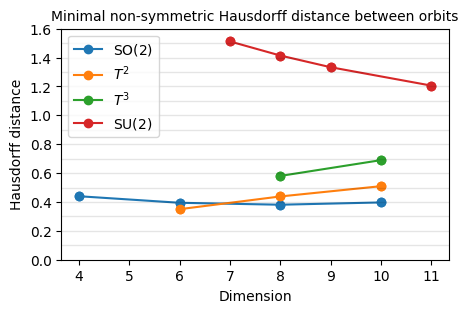

In [44]:
' Plot results - non-symmetric Hausdorff '

fig = plt.figure(figsize=(5, 3))

minima = np.min(np.concatenate(
    [np.array(Distances_SO2_nonsym)[:, 1], np.array(Distances_T2_nonsym)[:, 1], np.array(Distances_T3_nonsym)[:, 1],
     np.array(Distances_SU2_nonsym)[:, 1]]))
print('minima non-symmetric:', minima)

y = np.array(Distances_SO2_nonsym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$\mathrm{SO}(2)$')

y = np.array(Distances_T2_nonsym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$T^2$')

y = np.array(Distances_T3_nonsym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$T^3$')

y = np.array(Distances_SU2_nonsym)
plt.scatter(y[:, 0], y[:, 1])
plt.plot(y[:, 0], y[:, 1], marker="o", label=r'$\mathrm{SU}(2)$')

plt.title('Minimal non-symmetric Hausdorff distance between orbits', fontsize=10)
plt.xlabel('Dimension', fontsize=10)
plt.ylabel('Hausdorff distance', fontsize=10)
plt.xticks(range(4, ambient_dim_max + 2))
plt.ylim(4, ambient_dim_max + 2)
plt.ylim(0, 1.6)
plt.legend(loc="upper left")
for y in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]:
    plt.axhline(y, c='black', alpha=0.1, lw=1)
fig.savefig('figures/minimal_Hausdorff_nonsymmetric.png', dpi=fig.dpi, bbox_inches='tight')

# Section 4.4.3: Running time and convergence

In [45]:
ambient_dim_max = 10
number_tries = 100
number_tries_SU2 = 10

In [46]:
' SO(2) '

# Parameters
dim = 1  # dimension of the torus (here, circle)
n_points = 250  # number of sample points

Results_SO2 = []
print('SO(2)')
for ambient_dim in range(4, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = ambient_dim
    FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                     method="orbit-equivalence", verbose=False)

    for i in range(number_tries):
        Frequencies = random.choice(FrequenciesToTest)
        X = sample_orbit_from_rep("torus", rep_type=Frequencies, nb_points=n_points, conjugate_algebra=False,
                                  translate_orbit=False, verbose=False)

        start_time = time.time()

        n_neighbors = 4
        method = 'PCA'
        Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, correction=False)

        ' LieDetect '

        group, dim = 'torus', 1
        method_optim, frequency_max = 'abelian', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra(group, Sigma, dim, reps_to_test=FrequenciesToTest,
                                                                     method=method_optim, verbose=False)

        elapsed_time_secs = time.time() - start_time

        success = OptimalFrequencies == OptimalFrequencies  # Check if found frequencies are correct

        Results_SO2.append([ambient_dim, success, elapsed_time_secs])

' T2 '

# Parameters
dim = 2  # dimension of the torus (here, circle)
n_points = 500  # number of sample points

Results_T2 = []
print('T2')
for ambient_dim in range(6, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = 2
    if ambient_dim < 12:
        FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                         method="orbit-equivalence", verbose=False)
    else:
        FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                         method="span-equivalence", verbose=False)

    for i in range(number_tries):
        Frequencies = random.choice(FrequenciesToTest)
        X = sample_orbit_from_rep("torus", rep_type=Frequencies, nb_points=n_points, conjugate_algebra=False,
                                  translate_orbit=False, verbose=False)

        start_time = time.time()

        n_neighbors = 20
        method = 'PCA'
        Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, correction=False, verbose=False)

        ' LieDetect '

        group, dim = 'torus', 2
        method_optim, frequency_max = 'abelian', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra(group, Sigma, dim, reps_to_test=FrequenciesToTest,
                                                                     method=method_optim, verbose=False)

        elapsed_time_secs = time.time() - start_time

        success = are_representations_equivalent("torus", Frequencies, OptimalFrequencies,
                                                 verbose=False)  # Check if found frequencies are correct

        Results_T2.append([ambient_dim, success, elapsed_time_secs])

' T3 '

# Parameters
dim = 3
n_points = 1000  # number of sample points

Results_T3 = []
print('T3')
for ambient_dim in range(8, ambient_dim_max + 1, 2):
    print('Ambient dim', ambient_dim, end=' - ')

    frequency_max = 1
    FrequenciesToTest = get_lattices(lattice_rank=dim, ambient_rank=ambient_dim // 2, frequency_max=frequency_max,
                                     method="orbit-equivalence", verbose=False)

    for i in range(number_tries):
        Frequencies = random.choice(FrequenciesToTest)
        X = sample_orbit_from_rep("torus", rep_type=Frequencies, nb_points=n_points, conjugate_algebra=False,
                                  translate_orbit=False, verbose=False)

        start_time = time.time()

        n_neighbors = 40
        method = 'PCA'
        Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, correction=False, verbose=False)

        ' LieDetect '

        group, dim = 'torus', 3
        method_optim, frequency_max = 'abelian', frequency_max
        OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra(group, Sigma, dim, reps_to_test=FrequenciesToTest,
                                                                     method=method_optim, verbose=False)

        elapsed_time_secs = time.time() - start_time

        success = are_representations_equivalent("torus", Frequencies, OptimalFrequencies,
                                                 verbose=False)  # Check if found frequencies are correct
        # success = OptimalFrequencies==Frequencies

        Results_T3.append([ambient_dim, success, elapsed_time_secs])

' SU(2) - run once '

# Parameters
dim = 3  # dimension of the torus (here, circle)
n_points = 1000  # number of sample points

Results_SU2 = []
print('SU(2)')
for ambient_dim in range(4, ambient_dim_max + 1, 1):
    print('Ambient dim', ambient_dim, end=' - ')

    # Get frequencies to test
    FrequenciesToTest = get_constrained_partitions("SU(2)", ambient_dim)
    FrequenciesToTest = [tuple(f) for f in FrequenciesToTest if len(np.unique(f)) == len(f) and 1 not in f]
    print('Frequencies found:', len(FrequenciesToTest), end=' - \n')

    if len(FrequenciesToTest) > 0:
        for i in range(number_tries_SU2):
            Frequencies = random.choice(FrequenciesToTest)
            X = sample_orbit_from_rep("SU(2)", nb_points=n_points, rep_type=Frequencies, verbose=False)

            start_time = time.time()

            n_neighbors = 50
            method = 'PCA'
            Sigma = get_lie_pca_operator(X, n_neighbors, dim, method=method, correction=False)

            ' LieDetect '

            group, dim = 'SU(2)', 3
            method_optim, frequency_max = 'bottom_lie_pca', frequency_max
            OptimalFrequencies, OptimalLieAlgebra = find_closest_algebra(group, Sigma, dim,
                                                                         reps_to_test=FrequenciesToTest,
                                                                         method=method_optim, verbose=True)

            elapsed_time_secs = time.time() - start_time
            success = Frequencies == OptimalFrequencies  # Check if found frequencies are correct
            Results_SU2.append([ambient_dim, success, elapsed_time_secs, elapsed_time_secs / len(FrequenciesToTest)])
    else:
        print('')

SO(2)
Ambient dim 4 - Ambient dim 6 - Ambient dim 8 - Ambient dim 10 - T2
Ambient dim 6 - Ambient dim 8 - Ambient dim 10 - T3
Ambient dim 8 - Ambient dim 10 - SU(2)
Ambient dim 4 - Frequencies found: 1 - 
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (4,) with cost 2.816e+00.
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (4,) with cost 2.894e+00.
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (4,) with cost 2.751e+00.
----> Optimization problem via bottom_lie_pca method for SU(2)  <----
Solve minimization problem... It 1/1. Duration 0:00:00. Remaining 0:00:00.
The optimal rep found is (4,) with cost 2.569e+00.
----> Optim

In [47]:
' Print result '

print('SO(2)')
runningtime = [str(round(np.mean([res[2] for res in Results_SO2 if res[0] == ambient_dim]), 2)) for ambient_dim in
               range(4, ambient_dim_max + 1, 2)]
print('Running time & ' + 's & '.join(runningtime) + 's')
print(r'\\\hline')
success = [str(100 * np.mean([res[1] for res in Results_SO2 if res[0] == ambient_dim])) for ambient_dim in
           range(4, ambient_dim_max + 1, 2)]
print('Success & ' + '\\% & '.join(success) + '\\%')

print('\nT2')
runningtime = [str(round(np.mean([res[2] for res in Results_T2 if res[0] == ambient_dim]), 2)) for ambient_dim in
               range(6, ambient_dim_max + 1, 2)]
print('Running time & ' + 's & '.join(runningtime) + 's')
print(r'\\\hline')
success = [str(100 * np.mean([res[1] for res in Results_T2 if res[0] == ambient_dim])) for ambient_dim in
           range(6, ambient_dim_max + 1, 2)]
print('Success & ' + '\\% & '.join(success) + '\\%')

print('\nT3')
runningtime = [str(round(np.mean([res[2] for res in Results_T3 if res[0] == ambient_dim]), 2)) for ambient_dim in
               range(8, ambient_dim_max + 1, 2)]
print('Running time & ' + 's & '.join(runningtime) + 's')
print(r'\\\hline')
success = [str(100 * np.mean([res[1] for res in Results_T3 if res[0] == ambient_dim])) for ambient_dim in
           range(8, ambient_dim_max + 1, 2)]
print('Success & ' + '\\% & '.join(success) + '\\%')

print('\nSU(2)')
runningtime = [str(round(np.mean([res[2] for res in Results_SU2 if res[0] == ambient_dim]), 2)) for ambient_dim in
               range(4, ambient_dim_max + 1, 1)]
print('Running time & ' + 's & '.join(runningtime) + 's')
print(r'\\\hline')
success = [str(100 * np.mean([res[1] for res in Results_SU2 if res[0] == ambient_dim])) for ambient_dim in
           range(4, ambient_dim_max + 1, 1)]
print('Success & ' + '\\% & '.join(success) + '\\%')

SO(2)
Running time & 0.04s & 0.07s & 0.09s & 0.15s
\\\hline
Success & 100.0\% & 100.0\% & 100.0\% & 100.0\%

T2
Running time & 0.17s & 0.9s & 9.96s
\\\hline
Success & 79.0\% & 100.0\% & 100.0\%

T3
Running time & 0.43s & 1.36s
\\\hline
Success & 100.0\% & 100.0\%

SU(2)
Running time & 0.19s & 0.32s & nans & 1.13s & 1.26s & 1.76s & 1.35s
\\\hline
Success & 100.0\% & 100.0\% & nan\% & 100.0\% & 40.0\% & 80.0\% & 100.0\%


/home/rtinarra/.cache/pypoetry/virtualenvs/liedetect-8nEXKn2J-py3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rtinarra/.cache/pypoetry/virtualenvs/liedetect-8nEXKn2J-py3.12/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
